In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import time

seed=47

In [4]:
# load data
train_client=pd.read_csv('data/client_train.csv')  
# test_client=pd.read_csv('fraud_detection_fatema_piotr/data/client_test.csv')
# train_invoice=pd.read_csv('fraud_detection_fatema_piotr/data/invoice_train.csv')
# test_invoice=pd.read_csv('fraud_detection_fatema_piotr/data/invoice_test.csv')

In [5]:
train_client.shape[0]

135493

In [ ]:
test_client.shape[0]/(train_client.shape[0]+test_client.shape[0]) #30% testing
test_invoice.shape[0]/(train_invoice.shape[0]+test_invoice.shape[0]) #30% testing

0.30000206652132133

In [54]:
train_client.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 135493 entries, 0 to 135492
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   disrict        135493 non-null  int64  
 1   client_id      135493 non-null  object 
 2   client_catg    135493 non-null  int64  
 3   region         135493 non-null  int64  
 4   creation_date  135493 non-null  object 
 5   target         135493 non-null  float64
dtypes: float64(1), int64(3), object(2)
memory usage: 6.2+ MB


In [14]:
train_invoice.head()

,client_id,invoice_date,tarif_type,counter_number,counter_statue,counter_code,reading_remarque,counter_coefficient,consommation_level_1,consommation_level_2,consommation_level_3,consommation_level_4,old_index,new_index,months_number,counter_type
0,train_Client_0,2014-03-24,11,1335667,0,203,8,1,82,0,0,0,14302,14384,4,ELEC
1,train_Client_0,2013-03-29,11,1335667,0,203,6,1,1200,184,0,0,12294,13678,4,ELEC
2,train_Client_0,2015-03-23,11,1335667,0,203,8,1,123,0,0,0,14624,14747,4,ELEC
3,train_Client_0,2015-07-13,11,1335667,0,207,8,1,102,0,0,0,14747,14849,4,ELEC
4,train_Client_0,2016-11-17,11,1335667,0,207,9,1,572,0,0,0,15066,15638,12,ELEC


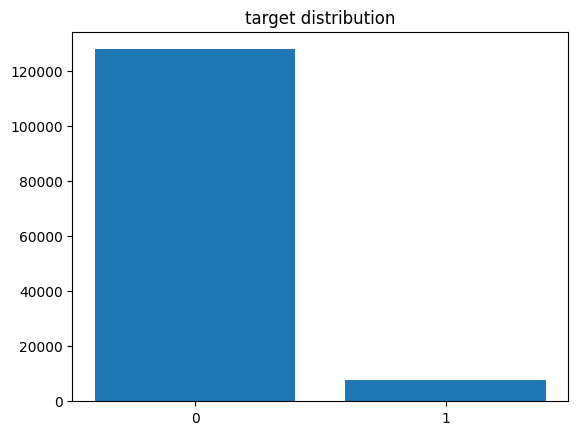

In [35]:
ds = train_client.groupby(['target'])['client_id'].count()
plt.bar(x=ds.index, height=ds.values, tick_label =[0,1])
plt.title('target distribution')
plt.show()

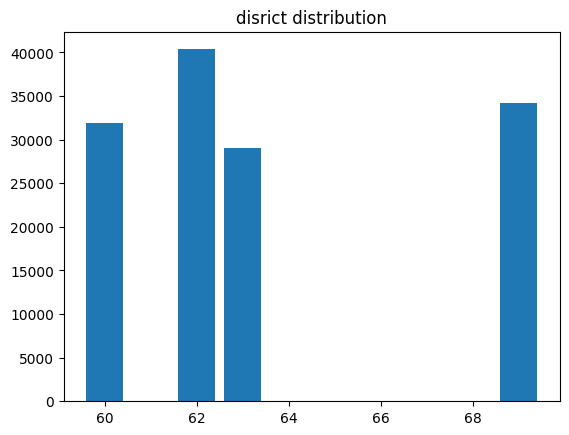

In [40]:
ds = train_client.groupby(['disrict'])['client_id'].count()
plt.bar(x=ds.index, height=ds.values)
plt.title('disrict distribution')
plt.show()

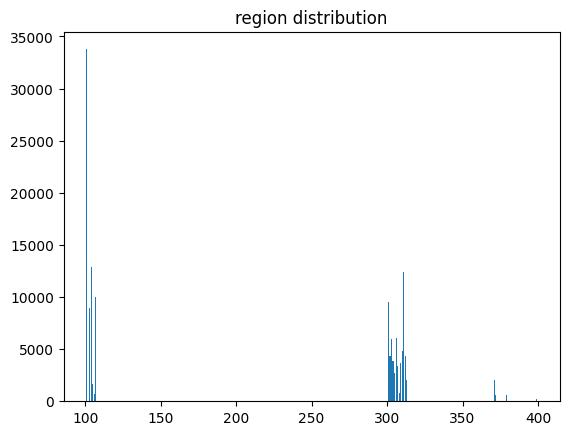

In [41]:
ds = train_client.groupby(['region'])['client_id'].count()
plt.bar(x=ds.index, height=ds.values)
plt.title('region distribution')
plt.show()

# Data cleaningin and feature engineering

In [48]:
# uniqueness of the data
print('Number of unique values in train_client:')
for col in train_client.columns:
    print(f"{col} - {train_client[col].nunique()}")
print('\n')
print('Number of unique values in train_invoice:')
for col in train_invoice.columns:
    print(f"{col} - {train_invoice[col].nunique()}")

Number of unique values in train_client:
disrict - 4
client_id - 135493
client_catg - 3
region - 25
creation_date - 8088
target - 2


Number of unique values in train_invoice:
client_id - 135493
invoice_date - 8275
tarif_type - 17
counter_number - 201893
counter_statue - 16
counter_code - 42
reading_remarque - 8
counter_coefficient - 16
consommation_level_1 - 8295
consommation_level_2 - 12576
consommation_level_3 - 2253
consommation_level_4 - 12075
old_index - 155648
new_index - 157980
months_number - 1370
counter_type - 2


In [1]:
train_client.describe()

NameError: name 'train_client' is not defined

## Trainining the model